# Hypothesis Testing

Personally this will always be one of my **favorite** topics because we all have been confronted with situations where this concept is relevant.<br>

Imagine the following situation:<br>

> You and one of your friends toss a coin that you have just got back when paying for ice cream.
> Both of you want to select the movie you are going to watch later.
> The winner of best of five gets to choose the movie.
> You choose **tail** and hence your friend **head**. You both know that the probability is $\frac{1}{2}$. 
> Ok actually everyone knows that this is the propbability for a fair coin.
> You finally start the game. 
> First toss - tail. 
> Second toss - tail.
> Third toss - tail.
> You won and get to choose the movie. Yeahhh.
> Your friend states with a smile on his face, that he is 100% sure that the coin is not fair.
> Is he right?
> Or was it just *luck*?

I bet that you have come across a similar situation in the past. And today is the day when you finally going to understand the statistics behind the luck
or bad luck.


Let's do some easy probability calculations:<br>

The probability that 3 coin tosses will land on the same side is:
$$
p_{HHH} = \frac{1}{2} \cdot \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{8}
$$

This does not seem unlikely but also not very likely. We cannot tell from this if the coin is not 100% fair.

Have a closer look at the probability distribution of a fair coin toss:

$$
p(n, k_{H}, p_{H}=\frac{1}{2}, p_{T}=\frac{1}{2}) = \frac{n!}{k!\cdot(n-k)!} p_{H}^k p_{T}^{n-k}
$$

This is the so called **Bernoulli** distribution and gives the probability for **k** times **Head (H)** when throwing the coin 
**N** times.

The excalamation mark **!** denote the mathematical faculty operation:

$$
l! = l \cdot (l-1) \cdot \dots 2 \cdot 1
$$

The question that we are now asking is: **what is the probability to get a result that is different from HHH?**<br>
We also want to make your friends statement about his **confidence** (before 100%, never good to go with 100% - now 99 %) more realisitic.<br>

The possibility that you have gotten a different coin toss to HHH is:

$$
1 - p_{HHH} = 1 - \frac{1}{8} = \frac{7}{8}
$$

Now you can see it either way:

$$
100\% - \mathrm{confidence} = 1\% < \frac{1}{8} = 12.5 \%
$$

or

$$
\mathrm{confidence} = 99\% > \frac{7}{8} = 87.5 \%
$$


The statement of your friend is wrong.<br>


What was intuitively done in the explanation above is an extremely simple case of hypothesis testing.<br>
**Wasn't that easy?**<br>


Now let's look at the case where we have an unfair coin and within 20 tosses it landed on head 18 times.<br>

This time it is you saying that the coin is unfair. This will be our alternative hypothesis $H_{a}$. Our null hypothesis
will remain the same. Do not think that it will be more difficult from now on just because I introduced these formal terms
*hypothesis*.

Writing it down in a strctured way is often very helpful, so lets do that:

- $H_{0}$: $p_{H} = \frac{1}{2}$
- $H_{a}$: $p_{H} > \frac{1}{2}$

Formulating the hypothesis may seem a bit difficult in the beginning, but actually it is pretty simple after doing it a few times.

The confidence is 99%.<br>

Our question is now, what is the probability that the toss lands 18 times or more often on head (19, 20) while the coin is fair.

The probability for this is

$$
\begin{align}
p(n, k_{H}\geq 18, p_{H}=\frac{1}{2}, p_{T}=\frac{1}{2}) &= \sum_{k=18}^{n = 20} \frac{n!}{k!\cdot(n-k)!} p_{H}^k p_{T}^{n-k}\\
&= p(n, k_{H} = 18, p_{H}=\frac{1}{2}, p_{T}=\frac{1}{2})  + p(n, k_{H} = 19, p_{H}=\frac{1}{2}, p_{T}=\frac{1}{2}) +
\end{align}
$$


With all the factorials this value becomes hard to calculate, at least for humans.<br>
**Doesn't matter because this Blog is also all about programming.**<br>

Let's us tackle this with *python*.

Import necessary libraries.

In [31]:
from math import factorial

Function that prints the probability with the percentage sign.

In [32]:
def print_percentage(value: float, prec: int = 4):
    print(f"{round(value*100, 4)} %")
    return

Calculate the probability for 18 or more heads.

In [33]:
# probability to get head (H) at least 18 out of 20 tosses
p_least_18_H = factorial(20)/(factorial(2) * factorial(20-2)) * 0.5**(2) * 0.5**(20-2) \
               + factorial(20)/(factorial(1) * factorial(20-1)) * 0.5**(1) * 0.5**(19) \
               + factorial(20)/(factorial(0) * factorial(20-0)) * 0.5**(0) * 0.5**(20)

print_percentage(p_least_18_H)

0.0201 %


The percentage is **0.0201 %** which means that the probability is extremely low that such an event happens when the coin is fair.

When comparing this to our confidence of **95 %** like before that this time we do not have the same situation as before.

$$
100 \% - 95 \% = 5 \% > 0.0201 \%
$$

Now comes the **important part** because we can make a statistical statement:<br>

***With a confidence of 95 % we can reject the null hypothesis $H_0$.***<br>

A confidence of 95 % also mean that we are mistaken only with a probability of 5 %. This is also called **first order error**.<br>


***NICE***
We actually did it.

### Additional

Additionally, I want to provide you with some code that shows the hypothesis test for a coin with different probabilities.<br>
The interesting part is the convergence relative number of tail/head tosses to the probability of the coin.<br>

Moreover, confidence intervals are calculated that provide a range of values where the true probability of the coin is with a certain confidence.<br>

Import some libraries that we need.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

Function that tosses the coin and returns an array with the results in numerical form.
- 0: tail (**T**)
- 1: head (**H**)

In [35]:
def toss_coins(N, p_H, p_T):
    np.random.seed(0)
    return np.random.choice([1, 0], size=N, p = [p_H, p_T])

Takes the numerical array and returns a visual representation of the coin tosses.

In [36]:
def print_pretty_tosses(tosses: np.ndarray):
    tosses_HT = []
    for i in tosses:
        if i == 1:
            tosses_HT.append("H")
        else:
            tosses_HT.append("T")
    print(*tosses_HT)
    return 

Define a true probability for the coin.

$$
\begin{align*}
p_true_H &= 0.6\\
p_true_T &= 1 - p_true_H = 0.4\\
\end{align*}
$$

In the next lines we will continously add more events from 1 to 1000 and calculate the relative number of heads and tails.<br>
We will see that the relative number of heads and tails will converge to the true probability of the coin.<br>

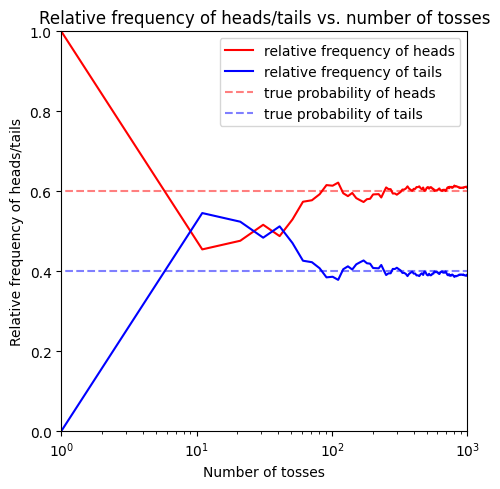

In [37]:
# empty lists to store the number of heads
frequency_of_heads = []

# empty lists to store the number of tails
frequency_of_tails = []

# step size of the loop
step_size = 10

# define the number of tosses
number_of_tosses = np.arange(1, 1001, step_size)

# define the true probability of getting head
p_true_H = 0.6
p_true_T = 1 - p_true_H

# iterate over the number of tosses and store relative frequency
np.random.seed(0) # for reproducibility
for N in number_of_tosses:
    tosses = toss_coins(N, p_true_H, p_true_T)
    frequency_of_heads.append(np.sum(tosses)/N)
    frequency_of_tails.append(1 - frequency_of_heads[-1])

# plot the results
plt.figure(figsize=(5, 5))

# plot data
plt.plot(number_of_tosses, frequency_of_heads, label="relative frequency of heads", color="red")
plt.plot(number_of_tosses, frequency_of_tails, label="relative frequency of tails", color="blue")

# plot true probability as a horizontal line
plt.hlines(p_true_H, xmin=0, xmax=1000, linestyle="--", label="true probability of heads", color="red", alpha=0.5)
plt.hlines(p_true_T, xmin=0, xmax=1000, linestyle="--", label="true probability of tails", color="blue", alpha=0.5)


# add plot title and axes labels
plt.title("Relative frequency of heads/tails vs. number of tosses")
plt.xlabel("Number of tosses")
plt.ylabel("Relative frequency of heads/tails")

# set xscale to log
plt.xscale("log")

# set min and max values for the x-axis
plt.xlim([1, 1000])

# set min and max values for the y-axis
plt.ylim([0, 1])

# add legend
plt.legend()

# tight layout
plt.tight_layout()

# show plot
plt.show()

As we expected the relative number of heads and tails converges to the true probability of the coin.<br>

Additionally to this we can calculate the confidence interval for the true probability of the coin.<br>
This can be done with the beta distribution.<br>

For this we will take the same code as before and modify it a bit.<br>

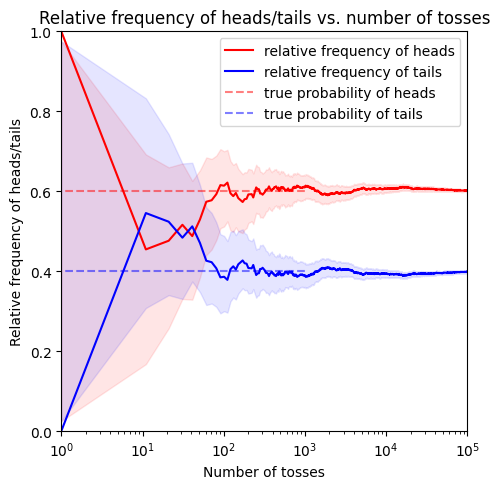

In [38]:
# empty lists to store the number of heads
frequency_of_heads = []

# empty lists to store the number of tails
frequency_of_tails = []

# significance level
signficance_level = 0.05

# NEW: empty list to store  upper and lower bounds of the confidence interval
upper_bound_heads = []
lower_bound_heads = []
upper_bound_tails = []
lower_bound_tails = []

# step size of the loop
step_size = 10

# define the number of tosses
number_of_tosses = np.arange(1, 100001, step_size)

# define the true probability of getting head
p_true_H = 0.6
p_true_T = 1 - p_true_H

# iterate over the number of tosses and store relative frequency
np.random.seed(0) # for reproducibility
for N in number_of_tosses:
    tosses = toss_coins(N, p_true_H, p_true_T)
    frequency_of_heads.append(np.sum(tosses)/N)
    frequency_of_tails.append(1 - frequency_of_heads[-1])

    # NEW: compute the confidence interval
    result_heads = beta.ppf([signficance_level/2, 1-signficance_level/2], a=np.sum(tosses), b=N-np.sum(tosses)+1)
    result_tails = beta.ppf([signficance_level/2, 1-signficance_level/2], a=N-np.sum(tosses)+1, b=np.sum(tosses))
    lower_bound_heads.append(result_heads[0])
    upper_bound_heads.append(result_heads[1])
    lower_bound_tails.append(result_tails[0])
    upper_bound_tails.append(result_tails[1])



# all nan values are replaced by 0
lower_bound_heads = np.nan_to_num(lower_bound_heads)
upper_bound_heads = np.nan_to_num(upper_bound_heads)
lower_bound_tails = np.nan_to_num(lower_bound_tails)
upper_bound_tails = np.nan_to_num(upper_bound_tails)

# plot the results
plt.figure(figsize=(5, 5))

# plot data
plt.plot(number_of_tosses, frequency_of_heads, label="relative frequency of heads", color="red")
plt.plot(number_of_tosses, frequency_of_tails, label="relative frequency of tails", color="blue")

# plot true probability as a horizontal line
plt.hlines(p_true_H, xmin=0, xmax=1000, linestyle="--", label="true probability of heads", color="red", alpha=0.5)
plt.hlines(p_true_T, xmin=0, xmax=1000, linestyle="--", label="true probability of tails", color="blue", alpha=0.5)

# NEW: plot confidence interval
plt.fill_between(number_of_tosses, lower_bound_heads, upper_bound_heads, color="red", alpha=0.1)
plt.fill_between(number_of_tosses, lower_bound_tails, upper_bound_tails, color="blue", alpha=0.1)


# add plot title and axes labels
plt.title("Relative frequency of heads/tails vs. number of tosses")
plt.xlabel("Number of tosses")
plt.ylabel("Relative frequency of heads/tails")

# set xscale to log
plt.xscale("log")

# set min and max values for the x-axis
plt.xlim([1, 100000])

# set min and max values for the y-axis
plt.ylim([0, 1])

# add legend
plt.legend()

# tight layout
plt.tight_layout()

# show plot
plt.show()

The graph shows the convergence of the frequency of heads and tails to the true probability of the unfair coin.As we would expect the relative values vary for small numbers of events but converge when drawing more and more events.<br>

It is also very nice to see the confidence intervals shrinking from almost the full possible range to a very small range. This means that at some point we can confidently (95 %) say that the true probability of the coin is within the very small range.<br>

Hope you enjoyed this post and learned something new. Please use the code for your own experiments and let me know if you have any questions.<br>